In [1]:
# Dependencies
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
from matplotlib import cm

from config import weather_key

In [3]:
# Import cities to check pollution values
big_city_df = pd.read_csv("Resources/big_city.csv")
small_city_df = pd.read_csv("Resources/small_city.csv")
high_rate_df = pd.read_csv("Resources/high_rate.csv")
low_rate_df = pd.read_csv("Resources/low_rate.csv")

cities_to_check_df = big_city_df
cities_to_check_df = cities_to_check_df.append(small_city_df, ignore_index=True)
cities_to_check_df = cities_to_check_df.append(high_rate_df, ignore_index=True)
cities_to_check_df = cities_to_check_df.append(low_rate_df, ignore_index=True)

cities_to_check_df

,City,Population,Public Transportation Rate,Median Age,Lat,Lng
0,Brooklyn,2480847.0,61.840460,34.694286,40.678178,-73.944158
1,Chicago,2309901.0,26.096482,34.290000,41.878114,-87.629798
2,Houston,1758164.0,2.762716,32.227907,29.760427,-95.369803
3,Las Vegas,1235945.0,4.647077,36.455172,36.169941,-115.139830
4,Los Angeles,1019978.0,12.176151,32.657143,34.052234,-118.243685
...,...,...,...,...,...,...
285,Lawrenceville,236710.0,0.979575,34.475000,40.301637,-74.736101
286,Suwanee,70891.0,0.980790,36.900000,34.051490,-84.071300
287,Del Sur,71313.0,0.981277,35.800000,38.909479,-77.045610
288,Overland Park,62517.0,0.995605,37.350000,38.982228,-94.670792


In [5]:
collected_measurements_df = pd.DataFrame()

base_url = "http://api.openweathermap.org/data/2.5/air_pollution/history?"

# January 1, 2021
startDate = pd.Timestamp('2021-01-01T12').timestamp()
# January 31, 2021
endDate = pd.Timestamp('2021-01-31T12').timestamp()

# Create series to convert to 'Unix time' with data type
ser = pd.Series([startDate, endDate], dtype='int32')

# Put converted dates into variables to use
startDate = ser[0]
endDate = ser[1]

for index, row in cities_to_check_df.iterrows():
    
    lat = cities_to_check_df.loc[index, "Lat"]
    lng = cities_to_check_df.loc[index, "Lng"]
    city = cities_to_check_df.loc[index, "City"]
    ptr = cities_to_check_df.loc[index, "Public Transportation Rate"]
    medAge = cities_to_check_df.loc[index, "Median Age"]
    population = cities_to_check_df.loc[index, "Population"]
    
    # The parameter piece of the URL
    param_url = f'lat={lat}&lon={lng}&start={startDate}&end={endDate}&appid={weather_key}'

    try:
        # Add parameters to query and convert to json
        response = requests.get(base_url + param_url)
        measurement_data = response.json()
    
        # Create a dataframe out of the result
        measurements_df = pd.DataFrame(measurement_data["list"])
        print(f'Checking on {city}')
    
    #print and move on
    except:
        print(f'Error in JSON pull for {city}')
    
    #Date and measurement conversion processing
    for index, row in measurements_df.iterrows():
    
        # Capture and convert data from UNIX time
        currentDate = measurements_df.loc[index, "dt"]
        currentDate = pd.Timestamp(currentDate, unit='s')
    
        # Capture singular AQI
        main = measurements_df.loc[index, "main"]
        aqi = main["aqi"]
    
        # Capture components breakdown
        components = measurements_df.loc[index, "components"]
        co = components["co"]
        no = components["no"]
        no2 = components["no2"]
        o3 = components["o3"]
        so2 = components["so2"]
        pm2_5 = components["pm2_5"]
        pm10 = components["pm10"]
        nh3 = components["nh3"]
    
        # Captured data to new dataframe columns
        measurements_df.loc[index, "datetime"] = currentDate
    
        measurements_df.loc[index, "co"] = co
        measurements_df.loc[index, "no"] = no
        measurements_df.loc[index, "no2"] = no2
        measurements_df.loc[index, "o3"] = o3
        measurements_df.loc[index, "so2"] = so2
        measurements_df.loc[index, "pm2_5"] = pm2_5
        measurements_df.loc[index, "pm10"] = pm10
        measurements_df.loc[index, "nh3"] = nh3
        
        measurements_df.loc[index, "aqi"] = aqi
    
    # Match census data back to API returns in the dataframe
    measurements_df = measurements_df.drop(columns=['main','components','dt'])
    measurements_df.loc[:,"City"] = city
    measurements_df.loc[:,"Public Transportation Rate"] = ptr
    measurements_df.loc[:,"Median Age"] = medAge
    measurements_df.loc[:,"Population"] = population
    
    collected_measurements_df = collected_measurements_df.append(measurements_df, ignore_index=True)
    #break

collected_measurements_df

Checking on Brooklyn
Checking on Chicago
Checking on Houston
Checking on Las Vegas
Checking on Los Angeles
Checking on Manhattan
Checking on Miami
Checking on Philadelphia
Checking on San Antonio
Checking on San Diego
Checking on Artesia
Checking on East Lansing
Checking on CRYSTAL CITY
Checking on Yardley
Checking on Fort Washington
Checking on DORCHESTR CTR
Checking on Peabody
Checking on Marshfield
Checking on Somerset
Checking on Belmont
Checking on Hoboken
Checking on Glendora
Checking on Oregon City
Checking on Denton
Checking on Southeast Washington
Checking on Christiana
Checking on Cathedral City
Checking on Kaneohe
Checking on Lombard
Checking on Rancho Cordova
Checking on Lithonia
Checking on Revere
Checking on Issaquah
Checking on Syracuse
Checking on Placentia
Checking on Kailua
Checking on Eagle Mountain
Checking on Santa Monica
Checking on E RNCHO DMNGZ
Checking on Bolingbrook
Checking on Union
Checking on Mill Creek
Checking on Romansville
Checking on Oxford
Checking on

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.840460,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.840460,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.840460,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.840460,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.840460,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202125,2021-01-01 16:00:00,253.68,0.13,7.28,32.19,0.78,2.13,2.45,0.27,1.0,Matthews,0.998507,40.050000,72164.0
202126,2021-01-01 15:00:00,263.69,0.09,8.23,28.25,0.78,2.31,2.62,0.28,1.0,Matthews,0.998507,40.050000,72164.0
202127,2021-01-01 14:00:00,277.04,0.12,9.85,21.82,0.85,2.61,2.91,0.29,1.0,Matthews,0.998507,40.050000,72164.0
202128,2021-01-01 13:00:00,283.72,0.28,10.37,13.41,0.89,3.20,3.48,0.25,1.0,Matthews,0.998507,40.050000,72164.0


In [7]:
# Collected measurements to CSV output
collected_measurements_df.to_csv("Resources/Collected_Pollution_Measurements.csv", encoding="utf-8", index=False)

In [2]:
# Read in previously collected air quality results
total_measurements_df = pd.read_csv("Resources\Collected_Pollution_Measurements.csv")
total_measurements_df

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.840460,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.840460,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.840460,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.840460,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.840460,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202125,2021-01-01 16:00:00,253.68,0.13,7.28,32.19,0.78,2.13,2.45,0.27,1.0,Matthews,0.998507,40.050000,72164.0
202126,2021-01-01 15:00:00,263.69,0.09,8.23,28.25,0.78,2.31,2.62,0.28,1.0,Matthews,0.998507,40.050000,72164.0
202127,2021-01-01 14:00:00,277.04,0.12,9.85,21.82,0.85,2.61,2.91,0.29,1.0,Matthews,0.998507,40.050000,72164.0
202128,2021-01-01 13:00:00,283.72,0.28,10.37,13.41,0.89,3.20,3.48,0.25,1.0,Matthews,0.998507,40.050000,72164.0


In [4]:
# Group by city for analysis
bycity_df = total_measurements_df
bycity_df = bycity_df.groupby(["City"])

# Calculate mean AQI for month of January 2021
meanAQI = bycity_df["aqi"].mean()
# Calculate standard deviation to check normal fluctuation
stdAQI = bycity_df["aqi"].std()
# Capture singular census Public Transportation figure
ptr = bycity_df["Public Transportation Rate"].mean()
# Capture singular census Population figure
pop = bycity_df["Population"].mean()
# Informal calculation to gauge rought ridership numbers
riders = pop*(ptr/100)
riders = riders.astype('int32')

# Place captured calculations into dataframe grouped by City
bycity_summary_df = pd.DataFrame({"Mean AQI": meanAQI,
                                  "Std AQI": stdAQI,
                                  "PTR": ptr,
                                  "Population": pop,
                                  "Riders": riders})
bycity_summary_df

,Mean AQI,Std AQI,PTR,Population,Riders
City,,,,,
Abilene,1.439024,0.615483,0.802012,57336.0,459
Aguadilla Pueblo,1.142037,0.349339,0.837139,53162.0,445
Alpharetta,1.281205,0.512605,0.966486,163810.0,1583
Altoona,1.205165,0.454324,0.594901,63235.0,376
Ames,1.464849,0.706486,8.730485,58891.0,5141
...,...,...,...,...,...
Woodside,1.428981,0.715926,68.267635,88939.0,60716
Woodville,1.183644,0.387472,0.596567,75390.0,449
Yardley,1.680057,1.085201,5.698565,51148.0,2914


The Pearson's r-value is: 0.3327723720689135


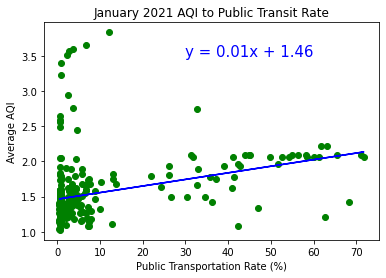

In [37]:
# Set values to plot and type for linear regression
x_values = bycity_summary_df["PTR"]
x_values = x_values.astype('float32')
y_values = bycity_summary_df["Mean AQI"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"b-")
# Format
plt.annotate(line_eq,(30,3.5),fontsize=15,color="blue")
plt.title('January 2021 AQI to Public Transit Rate')
plt.ylabel('Average AQI')
plt.xlabel('Public Transportation Rate (%)')

# Show Pearson's
print(f"The Pearson's r-value is: {rvalue}")

The Pearson's r-value is: 0.24188514312116507


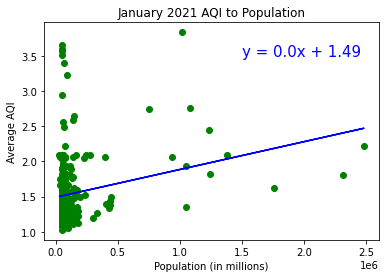

In [38]:
# Set values to plot and type for linear regression
x_values = bycity_summary_df["Population"]
#x_values = x_values.astype('float32')
y_values = bycity_summary_df["Mean AQI"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"b-")
# Format
plt.annotate(line_eq,(1500000,3.5),fontsize=15,color="blue")
plt.title('January 2021 AQI to Population')
plt.ylabel('Average AQI')
plt.xlabel('Population (in millions)')

# Save image to file
#plt.savefig("../Images/NH Humidity and Latitude Regression.png")

print(f"The Pearson's r-value is: {rvalue}")

The Pearson's r-value is: 0.2115024802015291


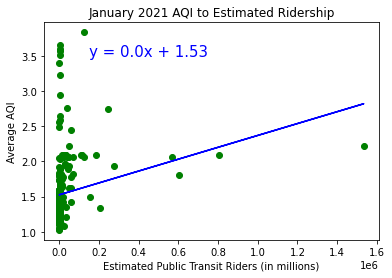

In [39]:
# Set values to plot and type for linear regression
x_values = bycity_summary_df["Riders"]
#x_values = x_values.astype('float32')
y_values = bycity_summary_df["Mean AQI"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"b-")
# Format
plt.annotate(line_eq,(150000,3.5),fontsize=15,color="blue")
plt.ylabel('Average AQI')
plt.xlabel('Estimated Public Transit Riders (in millions)')
plt.title('January 2021 AQI to Estimated Ridership')

print(f"The Pearson's r-value is: {rvalue}")

In [40]:
# Finding the highest average AQI for January
# Sort 
bycity_top10_df = bycity_summary_df.sort_values("Mean AQI", ascending=False)
# Display first 10 rows
bycity_top10_df.iloc[0:10,:]

,Mean AQI,Std AQI,PTR,Population,Riders
City,,,,,
Los Angeles,3.836442,1.379944,12.176151,1019978.0,124194
E RNCHO DMNGZ,3.648494,1.408554,6.627432,53657.0,3556
Santa Monica,3.602582,1.470454,3.566043,53651.0,1913
Artesia,3.571019,1.460561,2.636384,50069.0,1320
Hacienda Heights,3.515065,1.395854,2.200715,55237.0,1215
Palos Verdes Peninsula,3.401722,1.468793,0.796766,67902.0,541
HUNTINGTN BCH,3.225251,1.504608,0.780783,88481.0,690
Placentia,2.938307,1.501124,2.584794,53474.0,1382
San Diego,2.766141,1.386968,3.654742,1079953.0,39469


In [41]:
# Finding the lowest average AQI for January
# Sort 
bycity_bottom10_df = bycity_summary_df.sort_values("Mean AQI", ascending=True)
# Display first 10 rows
bycity_bottom10_df.iloc[0:10,:]

,Mean AQI,Std AQI,PTR,Population,Riders
City,,,,,
Cayey,1.027260,0.162956,0.743645,51116.0,380
Coeur d'Alene,1.037303,0.189639,0.506058,57152.0,289
Bend,1.060258,0.238136,0.658600,103048.0,678
Southeast Washington,1.086083,0.280588,42.397016,52480.0,22249
Issaquah,1.087518,0.282795,7.319397,53340.0,3904
Garrison,1.088953,0.284880,7.292003,57724.0,4209
Oxford,1.101865,0.302688,2.030596,53953.0,1095
Bristol,1.106169,0.308275,0.658909,98502.0,649
Hazard,1.107604,0.310102,12.789293,54353.0,6951


In [42]:
# Finding the highest standard deviation
# Sort 
bycity_top10_std_df = bycity_summary_df.sort_values("Std AQI", ascending=False)
# Display first 10 rows
bycity_top10_std_df.iloc[0:10,:]

,Mean AQI,Std AQI,PTR,Population,Riders
City,,,,,
Lake Forest,2.553802,1.511561,0.616333,59657.0,367
HUNTINGTN BCH,3.225251,1.504608,0.780783,88481.0,690
Placentia,2.938307,1.501124,2.584794,53474.0,1382
Sun City,2.647059,1.479348,0.632150,145367.0,918
Santa Monica,3.602582,1.470454,3.566043,53651.0,1913
Palos Verdes Peninsula,3.401722,1.468793,0.796766,67902.0,541
Artesia,3.571019,1.460561,2.636384,50069.0,1320
Flushing,2.063128,1.423945,31.837153,394703.0,125662
Jackson Heights,2.063128,1.423945,71.771714,63202.0,45361


In [43]:
# Finding the lowest standard deviation
# Sort 
bycity_bottom5_std_df = bycity_summary_df.sort_values("Std AQI", ascending=True)
# Display first 10 rows
bycity_bottom5_std_df.iloc[0:10,:]

,Mean AQI,Std AQI,PTR,Population,Riders
City,,,,,
Cayey,1.027260,0.162956,0.743645,51116.0,380
Coeur d'Alene,1.037303,0.189639,0.506058,57152.0,289
Bend,1.060258,0.238136,0.658600,103048.0,678
Southeast Washington,1.086083,0.280588,42.397016,52480.0,22249
Issaquah,1.087518,0.282795,7.319397,53340.0,3904
Garrison,1.088953,0.284880,7.292003,57724.0,4209
Oxford,1.101865,0.302688,2.030596,53953.0,1095
Bristol,1.106169,0.308275,0.658909,98502.0,649
Hazard,1.107604,0.310102,12.789293,54353.0,6951


Text(0.5, 0, 'Average AQI (for City)')

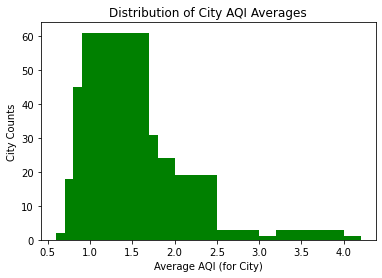

In [49]:
# Checking distribution of average AQI
# Set values to plot 
aqi_counts = round(bycity_summary_df["Mean AQI"],1)
distribution = aqi_counts.value_counts()
x_values = distribution.index
y_values = distribution

# Plot
plt.bar(x_values,y_values, color='green')
# Format
plt.title('Distribution of City AQI Averages')
plt.ylabel('City Counts')
plt.xlabel('Average AQI (for City)')
